In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
from sklearn import tree

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
print('shape of dataframe is: ', df.shape)

shape of dataframe is:  (1599, 12)


In [6]:
print('information about the file: \n')
df.info()

information about the file: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
qual = np.arange(3, 9, 1)
qual

array([3, 4, 5, 6, 7, 8])

C:\Users\elnaz\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\elnaz\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\elnaz\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning:

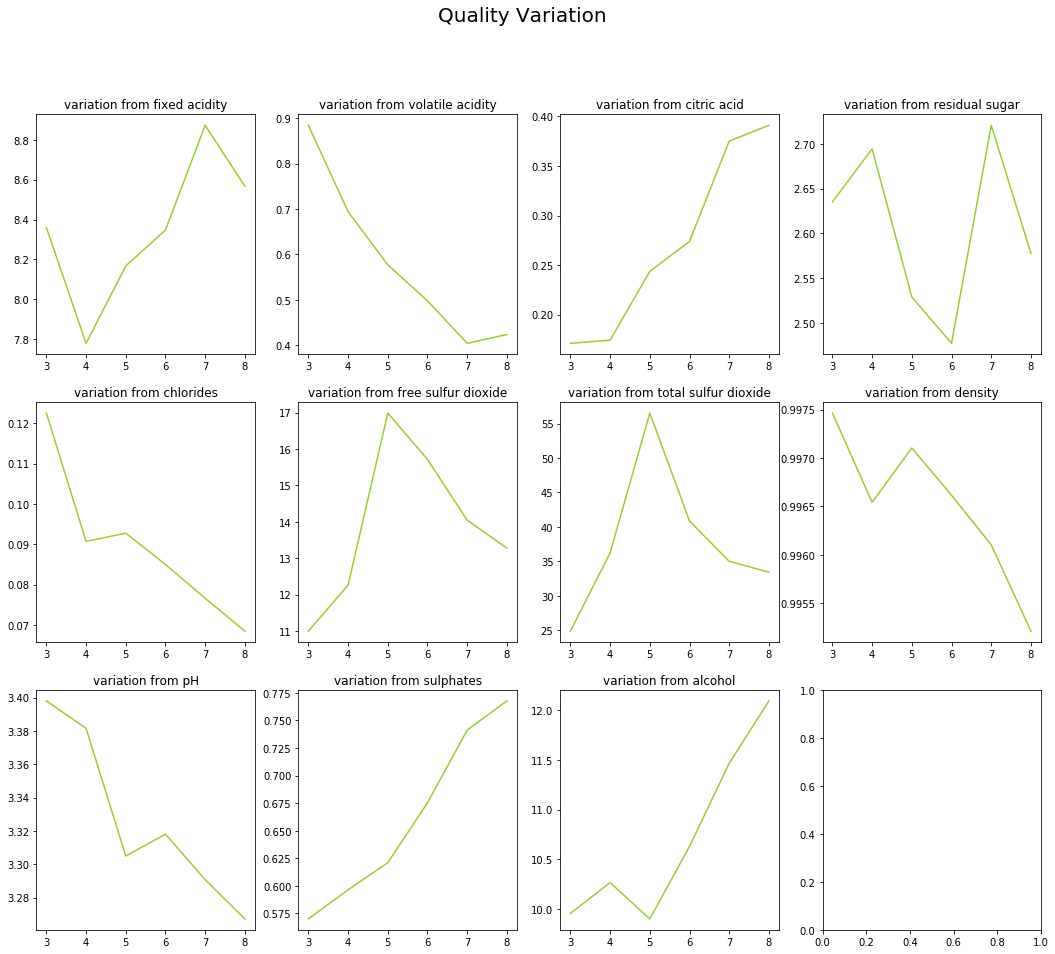

In [9]:
k=1
fig,axes=plt.subplots(3,4,figsize=(18, 15))
fig.suptitle('Quality Variation',fontsize=20)
for col in df.columns:
    if col != 'quality':
        arr=[]
        for i in qual:
            xx=df[df['quality']==i]
            arr.append(np.mean(xx[col])) 
            plt.subplot(3,4,k)
        plt.plot(qual,arr,color='yellowgreen')
        plt.title('variation from '+col)
        k+=1
         
plt.show()

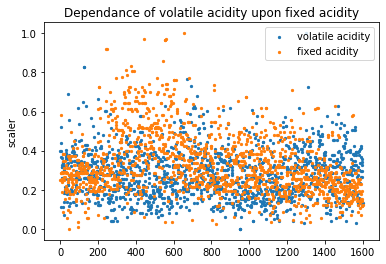

In [10]:
a=np.arange(1,len(df)+1,1)
plt.scatter(a,(df['volatile acidity']-min(df['volatile acidity']))/(max(df['volatile acidity'])-min(df['volatile acidity'])),label='volatile acidity',s=5)
plt.scatter(a,(df['fixed acidity']-min(df['fixed acidity']))/(max(df['fixed acidity'])-min(df['fixed acidity'])),label='fixed acidity',s=5)
plt.legend()
plt.ylabel('scaler')
plt.title('Dependance of volatile acidity upon fixed acidity')
plt.show()

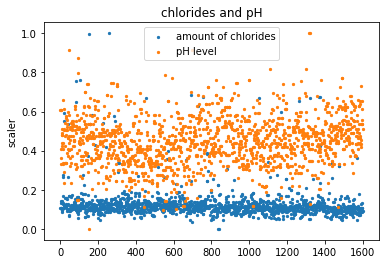

In [11]:
plt.scatter(a,(df['chlorides']-min(df['chlorides']))/(max(df['chlorides'])-min(df['chlorides'])),label='amount of chlorides',s=5)
plt.scatter(a,(df['pH']-min(df['pH']))/(max(df['pH'])-min(df['pH'])),label='pH level',s=5)
plt.legend()
plt.title('chlorides and pH')
plt.ylabel('scaler')
plt.show()

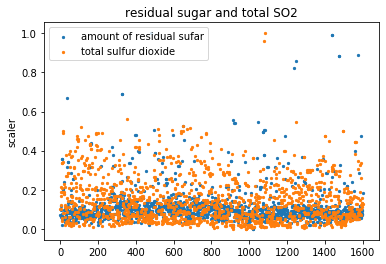

In [12]:
plt.scatter(a,(df['residual sugar']-min(df['residual sugar']))/(max(df['residual sugar'])-min(df['residual sugar'])),label='amount of residual sufar',s=5)
plt.scatter(a,(df['total sulfur dioxide']-min(df['total sulfur dioxide']))/(max(df['total sulfur dioxide'])-min(df['total sulfur dioxide'])),label='total sulfur dioxide',s=5)
plt.legend()
plt.title('residual sugar and total SO2')
plt.ylabel('scaler')
plt.show()

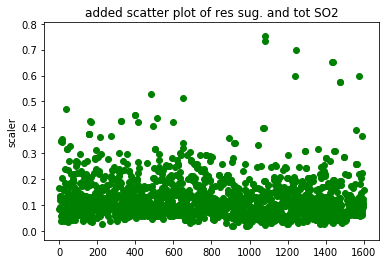

In [13]:
sugar=(df['residual sugar']-min(df['residual sugar']))/(max(df['residual sugar'])-min(df['residual sugar']))
so2=(df['total sulfur dioxide']-min(df['total sulfur dioxide']))/(max(df['total sulfur dioxide'])-min(df['total sulfur dioxide']))
new_att=np.add(sugar,so2)/2

plt.scatter(a,new_att,color='g')
plt.title('added scatter plot of res sug. and tot SO2')
plt.ylabel('scaler')
plt.show()

In [15]:
dx=df.sample(frac=1)
dx.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
255,8.0,0.57,0.23,3.2,0.073,17.0,119.0,0.99675,3.26,0.57,9.3,5
1427,7.6,0.41,0.33,2.5,0.078,6.0,23.0,0.99570,3.30,0.58,11.2,5
308,10.3,0.43,0.44,2.4,0.214,5.0,12.0,0.99940,3.19,0.63,9.5,6
1153,9.6,0.42,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.1,6
1017,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6


In [16]:
X_ns=df.drop('quality',1)
y_ns=df['quality']
X_s=dx.drop('quality',1)
y_s=dx['quality']
print('shape of X :',X_s.shape)
print('shape of Y :',y_s.shape)

shape of X : (1599, 11)
shape of Y : (1599,)


In [17]:
X_train_ns,X_test_ns,y_train_ns,y_test_ns=train_test_split(X_ns,y_ns,test_size=0.2)
X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(X_s,y_s,test_size=0.2)
print('shape of train X : ',X_train_ns.shape)
print('shape of test X : ',X_test_ns.shape)
print('shape of train Y : ',y_train_ns.shape)
print('shape of test Y : ',y_test_ns.shape)

shape of train X :  (1279, 11)
shape of test X :  (320, 11)
shape of train Y :  (1279,)
shape of test Y :  (320,)


In [18]:
model=RandomForestClassifier(random_state=0)

In [20]:
# non-shuffled data

model.fit(X_train_ns,y_train_ns)
print(' accuracy score over non-shuffled train data : ',model.score(X_train_ns,y_train_ns))
print(' model accuracy over non-shuffled test data : ',model.score(X_test_ns,y_test_ns))



# shuffled data

model.fit(X_train_s,y_train_s)
print(' accuracy score over shuffled train data : ',model.score(X_train_s,y_train_s))
print(' model accuracy over shuffled test data : ',model.score(X_test_s,y_test_s))


 accuracy score over non-shuffled train data :  1.0
 model accuracy over non-shuffled test data :  0.725
 accuracy score over shuffled train data :  1.0
 model accuracy over shuffled test data :  0.696875


In [21]:
model=svm.SVC()

In [22]:
# non-shuffled data

model.fit(X_train_ns,y_train_ns)
print(' accuracy score over non-shuffled train data : ',model.score(X_train_ns,y_train_ns))
print(' model accuracy over non-shuffled test data : ',model.score(X_test_ns,y_test_ns))



# shuffled data

model.fit(X_train_s,y_train_s)
print(' accuracy score over shuffled train data : ',model.score(X_train_s,y_train_s))
print(' model accuracy over shuffled test data : ',model.score(X_test_s,y_test_s))


 accuracy score over non-shuffled train data :  0.49257232212666147
 model accuracy over non-shuffled test data :  0.546875
 accuracy score over shuffled train data :  0.5089913995308835
 model accuracy over shuffled test data :  0.4875


In [23]:
model=KNeighborsClassifier(n_neighbors=6)  

In [24]:
# non-shuffled data

model.fit(X_train_ns,y_train_ns)
print(' accuracy score over non-shuffled train data : ',model.score(X_train_ns,y_train_ns))
print(' model accuracy over non-shuffled test data : ',model.score(X_test_ns,y_test_ns))



# shuffled data

model.fit(X_train_s,y_train_s)
print(' accuracy score over shuffled train data : ',model.score(X_train_s,y_train_s))
print(' model accuracy over shuffled test data : ',model.score(X_test_s,y_test_s))

 accuracy score over non-shuffled train data :  0.6254886630179828
 model accuracy over non-shuffled test data :  0.559375
 accuracy score over shuffled train data :  0.6286161063330727
 model accuracy over shuffled test data :  0.509375


In [25]:
model=tree.DecisionTreeClassifier()

In [26]:
# non-shuffled data

model.fit(X_train_ns,y_train_ns)
print(' accuracy score over non-shuffled train data : ',model.score(X_train_ns,y_train_ns))
print(' model accuracy over non-shuffled test data : ',model.score(X_test_ns,y_test_ns))



# shuffled data

model.fit(X_train_s,y_train_s)
print(' accuracy score over shuffled train data : ',model.score(X_train_s,y_train_s))
print(' model accuracy over shuffled test data : ',model.score(X_test_s,y_test_s))

 accuracy score over non-shuffled train data :  1.0
 model accuracy over non-shuffled test data :  0.6625
 accuracy score over shuffled train data :  1.0
 model accuracy over shuffled test data :  0.6375


[Text(150.05351546358472, 212.71304347826086, 'X[10] <= 10.25\ngini = 0.643\nsamples = 1279\nvalue = [8, 42, 533, 522, 160, 14]'),
 Text(90.75516206095041, 203.2591304347826, 'X[6] <= 98.5\ngini = 0.53\nsamples = 687\nvalue = [5, 23, 415, 220, 22, 2]'),
 Text(48.69710098140496, 193.80521739130435, 'X[9] <= 0.555\ngini = 0.561\nsamples = 600\nvalue = [5, 23, 333, 215, 22, 2]'),
 Text(13.821740702479339, 184.3513043478261, 'X[4] <= 0.069\ngini = 0.46\nsamples = 198\nvalue = [3, 15, 139, 40, 1, 0]'),
 Text(6.087272727272728, 174.89739130434782, 'X[4] <= 0.069\ngini = 0.625\nsamples = 28\nvalue = [1, 2, 12, 12, 1, 0]'),
 Text(4.980495867768595, 165.44347826086957, 'X[10] <= 9.2\ngini = 0.624\nsamples = 23\nvalue = [1, 2, 12, 7, 1, 0]'),
 Text(2.2135537190082646, 155.98956521739132, 'X[6] <= 9.0\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 0, 3, 0, 0]'),
 Text(1.1067768595041323, 146.53565217391304, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(3.320330578512397, 146.535652173

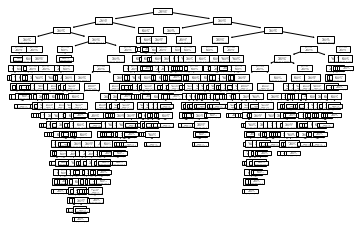

In [28]:

tree.plot_tree(model)
